In [16]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 753.5 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached dataclasses_json-0.5.14-py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached greenlet-2.0.2-cp39-cp39-macosx_11_0_x86_64.whl (241 kB)

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from PyPDF2 import PdfReader
import nltk
nltk.download('punkt')

# Extracting Text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf = PdfReader(file)
        text = " ".join(page.extract_text() for page in pdf.pages)
    return text

# Extract text from the PDF and split it into sentences
text = extract_text_from_pdf("May 2023_Data_Science_Corner.pdf")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashanksahoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
sample = text[1015:3037]
print(sample)

formation need expressed asatextual query .
Many theoretical models ofhow people search have been proposed tohelp design
efficient IRsystems .Aclassical example isthecognitive model proposed bySutcliffe and
Ennis2,where theinformation seeking process ismodeled asacycle ofthefollowing .
1. Problem identification
2. Articulation ofinformation needs
3. Query re-formulation
4. Results evaluation
Given acorpus comprised ofmultiple documents andaquery, regarded asrepresentative
oftheuser’s information need, aretrieval system generates aranked listofcorpus
documents indescending order ofrelevance .Thus, thecore problem ofretrieval ishow to
estimate thedegree ofrelevance, also known asrelevance score, between aquery and a
document .
Many methods, also known asretrieval models, have been proposed tocalculate the
relevance score .While there isnosingle model that isconsidered fundamentally better
than theothers, three groups ofmodels arewell established :classical retrieval models,
Learning toRa

## NLTK Sentence Tokenizer

In [5]:
import nltk
nltk.download('punkt')

# Splitting Text into Sentences
def split_text_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

nltk_sentences = split_text_into_sentences(text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashanksahoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
len(nltk_sentences)

128

In [9]:
nltk_chunk_lenghts = [len(x) for x in nltk_sentences]

In [12]:
max(nltk_chunk_lenghts)

1091

/var/folders/rq/73_t64xn2zxf07vggynh53800000gq/T/ipykernel_81427/1871694359.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nltk_chunk_lenghts, kde=True, bins=15)


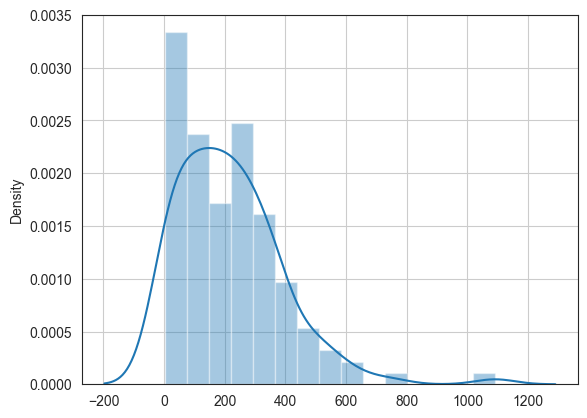

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

#create histogram with density curve overlaid
sns.distplot(nltk_chunk_lenghts, kde=True, bins=15)
plt.grid()

## Spacy Sentence Splitter

In [7]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
spacy_sentences = list(doc.sents)

2023-08-30 15:08:34.311702: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
len(spacy_sentences)

164

In [13]:
spacy_chunk_lenghts = [len(x) for x in spacy_sentences]

/var/folders/rq/73_t64xn2zxf07vggynh53800000gq/T/ipykernel_81427/2737878284.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spacy_chunk_lenghts, kde=True, bins=15)


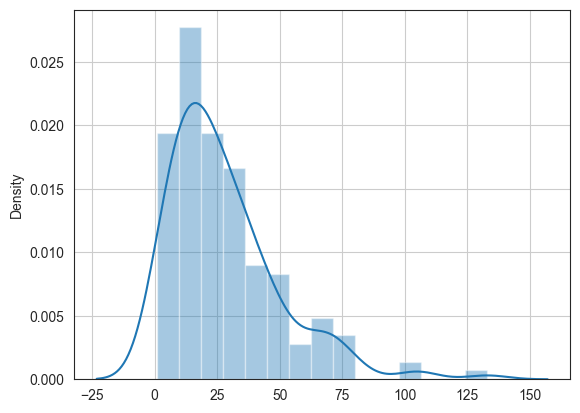

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

#create histogram with density curve overlaid
sns.distplot(spacy_chunk_lenghts, kde=True, bins=15)
plt.grid()

## Langchain Recursive Splitter

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 100,
    chunk_overlap  = 20,
    # Use length of the text as the size measure
    length_function = len,

)

# Create the chunks
langchain_texts = custom_text_splitter.create_documents([text])

In [19]:
langchain_chunk_lenghts = [len(x.page_content) for x in langchain_texts]

/var/folders/rq/73_t64xn2zxf07vggynh53800000gq/T/ipykernel_81427/3143237624.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(langchain_chunk_lenghts, kde=True, bins=15)


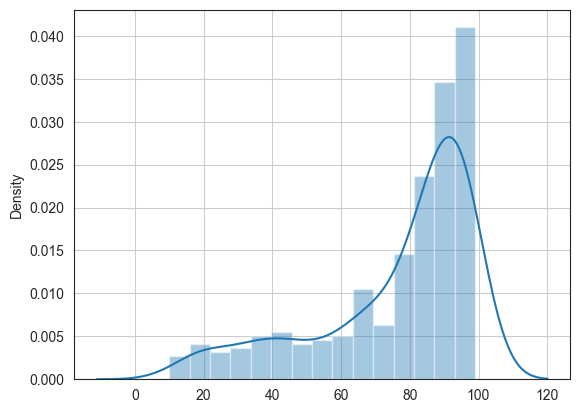

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

#create histogram with density curve overlaid
sns.distplot(langchain_chunk_lenghts, kde=True, bins=15)
plt.grid()

/var/folders/rq/73_t64xn2zxf07vggynh53800000gq/T/ipykernel_81427/1388610487.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(langchain_chunk_lenghts, kde=True, bins=15)


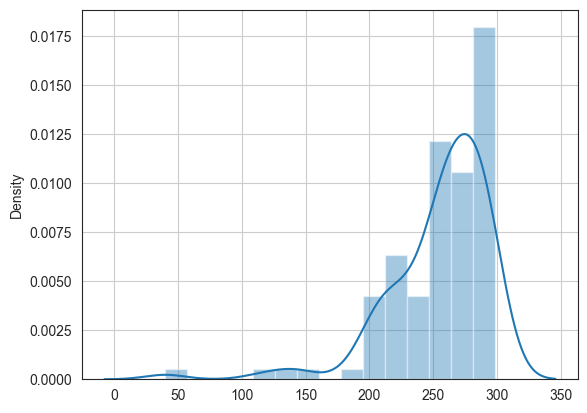

In [21]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 300,
    chunk_overlap  = 30,
    # Use length of the text as the size measure
    length_function = len,
    # Use only "\n\n" as the separator
    separators = ['\n\n', '\n', " ", ""]
)

# Create the chunks
langchain_texts = custom_text_splitter.create_documents([text])
langchain_chunk_lenghts = [len(x.page_content) for x in langchain_texts]

sns.set_style("white")

#create histogram with density curve overlaid
sns.distplot(langchain_chunk_lenghts, kde=True, bins=15)
plt.grid()

## KMeans Clustering

In [22]:
import numpy as np
import spacy

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

def process(text):
    doc = nlp(text)
    sents = list(doc.sents)
    vecs = np.stack([sent.vector / sent.vector_norm for sent in sents])

    return sents, vecs

def cluster_text(sents, vecs, threshold):
    clusters = [[0]]
    for i in range(1, len(sents)):
        if np.dot(vecs[i], vecs[i-1]) < threshold:
            clusters.append([])
        clusters[-1].append(i)
    
    return clusters

def clean_text(text):
    # Add your text cleaning process here
    return text

# Initialize the clusters lengths list and final texts list
clusters_lens = []
final_texts = []

# Process the chunk
threshold = 0.3
sents, vecs = process(text)

# Cluster the sentences
clusters = cluster_text(sents, vecs, threshold)

for cluster in clusters:
    cluster_txt = clean_text(' '.join([sents[i].text for i in cluster]))
    cluster_len = len(cluster_txt)
    
    # Check if the cluster is too short
    if cluster_len < 60:
        continue
    
    # Check if the cluster is too long
    elif cluster_len > 3000:
        threshold = 0.6
        sents_div, vecs_div = process(cluster_txt)
        reclusters = cluster_text(sents_div, vecs_div, threshold)
        
        for subcluster in reclusters:
            div_txt = clean_text(' '.join([sents_div[i].text for i in subcluster]))
            div_len = len(div_txt)
            
            if div_len < 60 or div_len > 3000:
                continue
            
            clusters_lens.append(div_len)
            final_texts.append(div_txt)
            
    else:
        clusters_lens.append(cluster_len)
        final_texts.append(cluster_txt)

In [23]:
final_texts_lengths = [len(chunk) for chunk in final_texts]

/var/folders/rq/73_t64xn2zxf07vggynh53800000gq/T/ipykernel_81427/3565329410.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_texts_lengths, kde=True, bins=15)


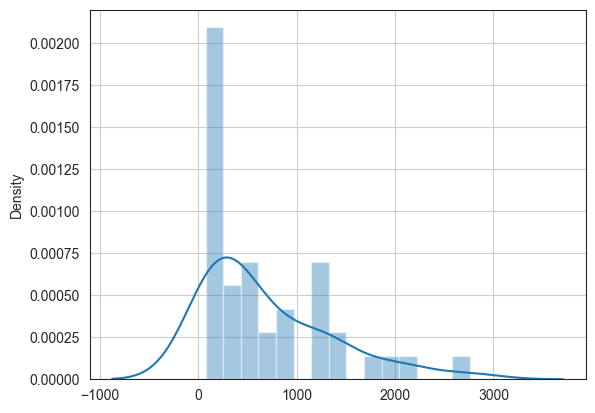

In [24]:
sns.set_style("white")

#create histogram with density curve overlaid
sns.distplot(final_texts_lengths, kde=True, bins=15)
plt.grid()

In [ ]:
## Chunkin